In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
import os
import code2 as c
from matplotlib.ticker import StrMethodFormatter

In [47]:
from importlib import reload
reload(c)

<module 'code2' from 'c:\\Users\\Utente\\Desktop\\GT\\code2.py'>

In [48]:
grid_sell = 2.5
grid_buy = 0.1
start_price = 1
elasticity = 1.
T = 50
N = 1000

In [49]:
utility = np.array([])
game_state = np.array([])
price_series = np.array([])

for i in range(N):
    A = c.Player('A',
                renewable_boundaries=(0.1,1.),
                mean_consumption=.4,
                battery_capacity = 1. ,  
                energy_threshold = .3
                ) 
    B = c.Player('B',
                renewable_boundaries=(0.1,1.),
                mean_consumption=.4,
                battery_capacity = 1. ,  
                energy_threshold = .3
                ) 
    trial_utility, trial_game_state, trial_price_series = c.static_game([A, B], T, start_price, elasticity, grid_sell, grid_buy)
    utility = np.append(utility, trial_utility)
    game_state = np.append(game_state, trial_game_state)
    price_series = np.append(price_series, trial_price_series)
utility = utility.reshape(2, T, N)
utility = np.mean(utility, axis=2)
game_state = game_state.reshape(2, T, N)
game_state = np.mean(game_state, axis=2)
price_series = price_series.reshape(1, T, N)
price_series = np.mean(price_series, axis=2)

Player :  0  is  nothing
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  nothing
Player :  1  is  sell
Player :  0  is  nothing
Player :  1  is  buy
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  nothing
Player :  1  is  buy
Player :  0  is  buy
Player :  1  is  sell
Player :  0  is  nothing
Player :  1  is  buy
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  nothing
Player :  1  is  buy
Player :  0  is  nothing
Player :  1  is  sell
Player :  0  is  nothing
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  buy
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  sell
Player :  1  is  sell
Player :  0  is  nothing
Player :  1  is  buy
Player :  0 

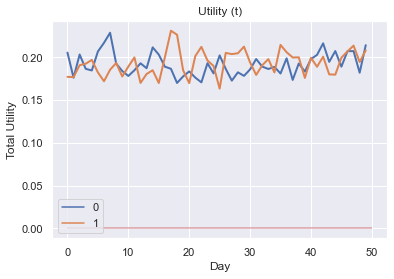

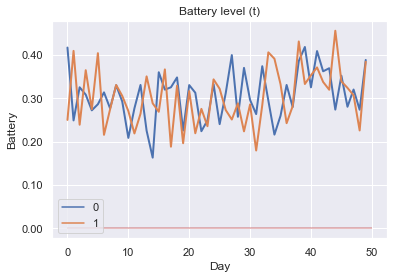

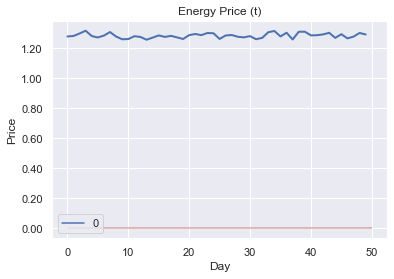

In [50]:
sns.set_theme(style="darkgrid")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:2.2f}'))
sns.lineplot(data=utility.T, lw=2, dashes=False)
plt.title('Utility (t)')
plt.ylabel('Total Utility')
plt.xlabel('Day')
plt.hlines(0,0,T, color='r', alpha=0.5)
plt.show()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:02.2f}'))
sns.lineplot(data=game_state.T, lw=2, dashes=False)
plt.title('Battery level (t)')
plt.ylabel('Battery')
plt.xlabel('Day')
plt.hlines(0,0,T, color='r', alpha=0.5)
#plt.ylim((-0.5, 1))
plt.show()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:02.2f}'))
sns.lineplot(data=price_series.T, lw=2, dashes=False)
plt.title('Energy Price (t)')
plt.ylabel('Price')
plt.xlabel('Day')
plt.hlines(0,0,T, color='r', alpha=0.5)
plt.show()